# Case study on regression and correlation

## Importing the libraries needed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Reading the dataset to the python environment

In [5]:
data= pd.read_csv('Add_sales_data_2018.csv')

## Preprocessing

In [6]:
data.head()
##checking whether the dataset is loaded properly

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


***The given dataset is loaded properly***

In [7]:
data.shape
##checking the shape of the dataset

(205, 7)

***The given dataset consist of 205 rows and 7 columns***

In [8]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


***It consist of 6 floating point datatype columns and one object type datatype column***

In [9]:
data.isna().sum()
##Checking for any null values present in the dataset 

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

***There are no null values present in the dataset***

In [10]:
data.describe()
##Checking the statistics of columns

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


***Here we could get the count,mean,standard deviation,quartile range,interquartile range etc of different columns***

### Plotting a histogram of all columns 

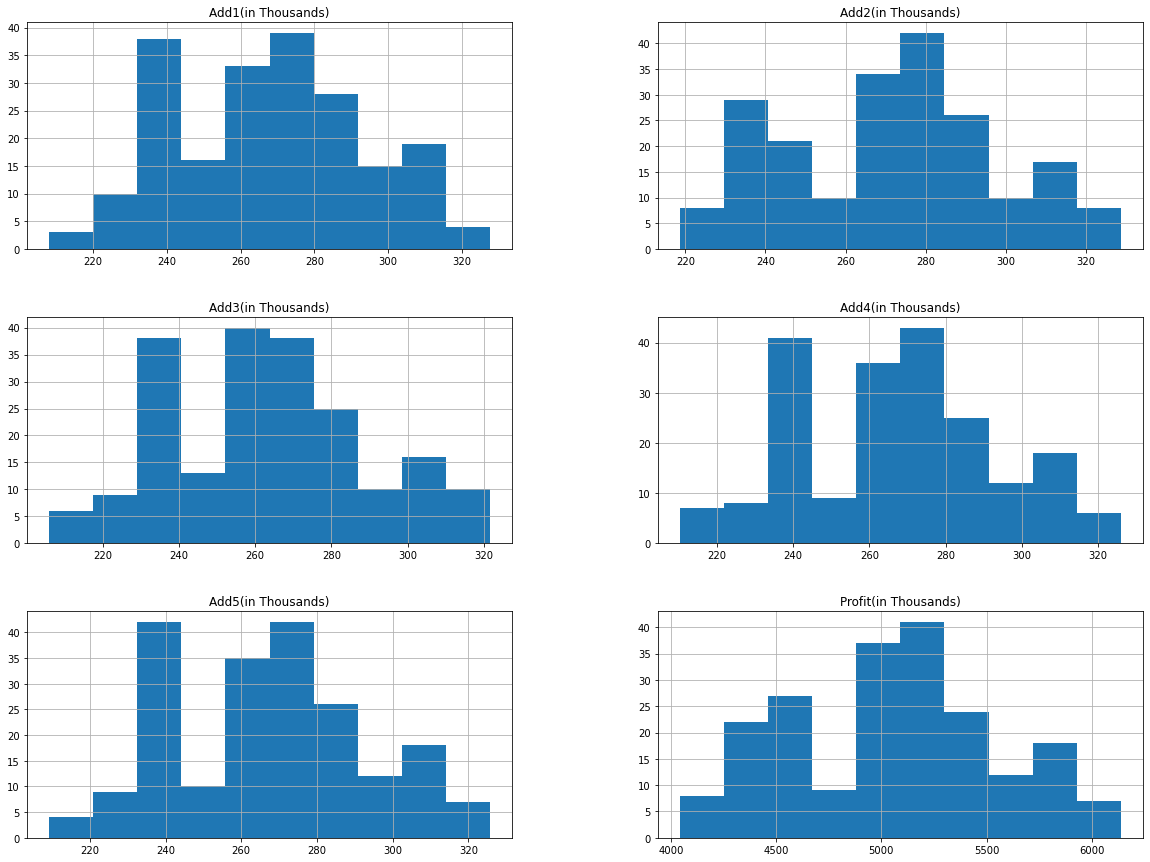

In [11]:
hist=data.hist(figsize=(20,15))
plt.show()

#### The data set provided had profit and add(1-5) values from 2018 to 2017 arranged in an ascending order across different dates. ###
#### From the histograms we could understand that all the add values and profit values intially had a rise followed by a dip to stabilizing in the high values followed by a dip, which implies that profit generated gets decreased if the amount spend on ads are reduced

## 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

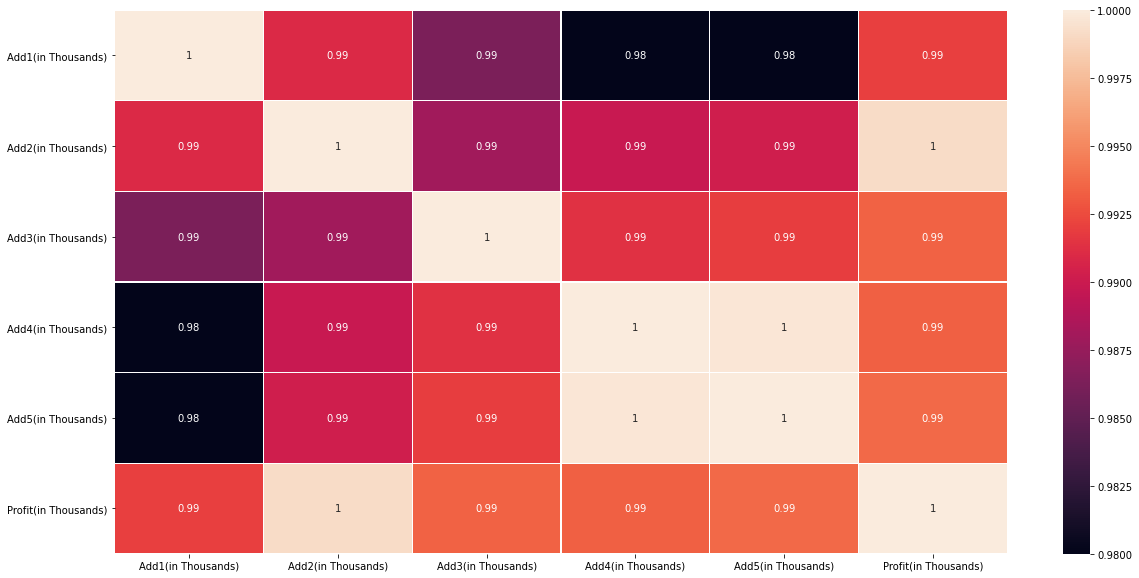

In [12]:
##checking the correlation between amount spent on advertising through five different companies and the profit generated
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=0.98,annot=True,linewidth=0.2)##using heatmap to show the relation

***1.From the correlation heatmap we can understand that add2 and profit have the highest positive correlation of 1. while all the other add values also show a high positive correlation with profit***

***2.add4 and add5 also shows a high positive correlation***

## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [14]:
data.columns ##to display the columns inorder to avoid spelling mistakes

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [15]:
y=data['Profit(in Thousands)'] ##it is target or the dependent variable

x=data.drop(['Date','Profit(in Thousands)'],axis=1) ##It is the independent variable
##here we are dropping date and profit and taking all other columns

In [17]:
x.shape
##checking whether the columns are dropped or not

(205, 5)

 here we can see the columns value has been reduced from 7 to 5

In [25]:
##splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

##splitting x and y into x_train,x_test and y_train,y_test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
##Here 25% of data is given for testing and 75% for training

In [28]:
##making the linear regression model
from sklearn import linear_model ##importing the regressiln model from sklearn

regmodel=linear_model.LinearRegression() ## creating an instance of linear reg model and storing it to regmodel

In [29]:
##fitting the instance created to the training data and creating the linear regression model
model=regmodel.fit(x_train,y_train)
##storing the linear regression model to a variable

In [30]:
##predicting the ouput for x_test values
pred=model.predict(x_test)

#### Checking the orginal values and predicted values

In [31]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [32]:
print(pred)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [34]:
##Checking the accuracy of the model
##here mean squared error method is used to check the accuracy

from sklearn.metrics import mean_squared_error
print("MSE :", mean_squared_error(y_test,pred))

MSE : 8.11273293080854e-25


#### As the MSE value is very low almost equal to zero , we could say that the predicted model is accurate

## 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
## Add1(in Thousands) 290
## Add2(in Thousands) 312
## Add3(in Thousands) 309
## Add4(in Thousands) 298
## Add5(in Thousands) 320

In [38]:
data1=[[290,312,308,298,320]] ##storing the values given to a variable

prediction=model.predict(data1)##making the prediction

print('The profit generated by the company for the data given is:',prediction)


The profit generated by the company for the data given is: [5816.56]
